
Logistic Regression Metrics:
Accuracy: 0.7975
Precision: 0.7647
Recall: 0.5200
F1-score: 0.6190


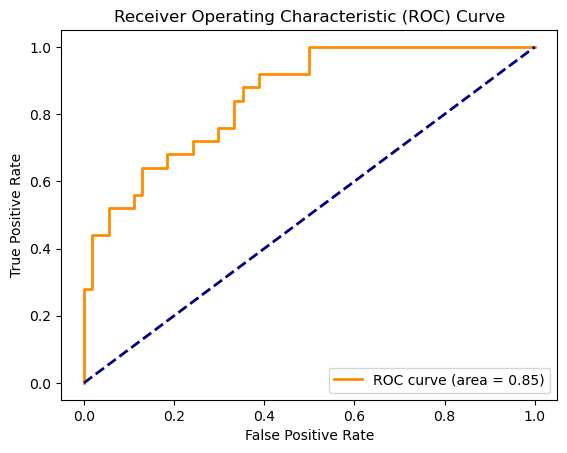


Random Forest Metrics:
Accuracy: 0.7848
Precision: 0.6818
Recall: 0.6000
F1-score: 0.6383


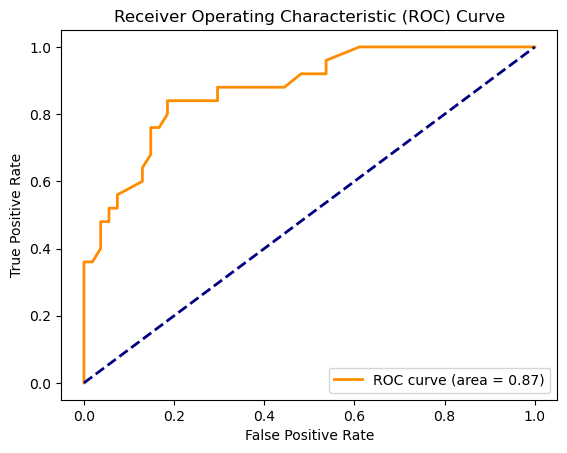


GBDT Metrics:
Accuracy: 0.7722
Precision: 0.7059
Recall: 0.4800
F1-score: 0.5714


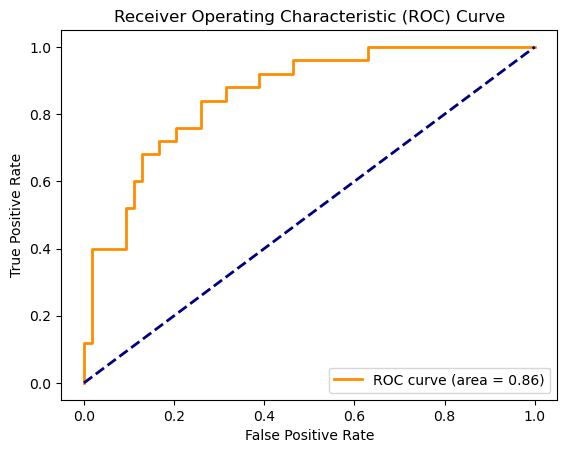


KNN Metrics:
Accuracy: 0.7468
Precision: 0.6316
Recall: 0.4800
F1-score: 0.5455


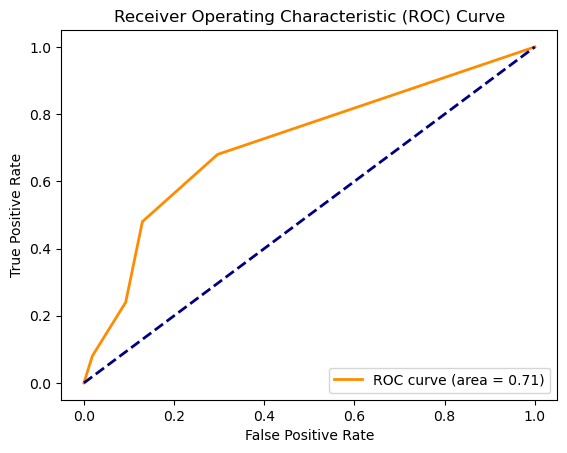


XGBoost Metrics:
Accuracy: 0.8101
Precision: 0.7500
Recall: 0.6000
F1-score: 0.6667


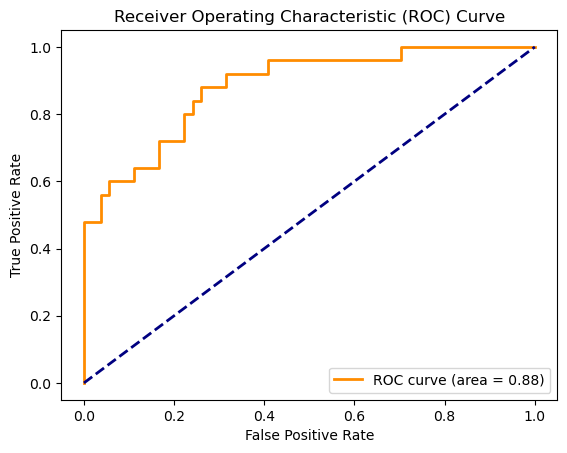

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
db = pd.read_csv("../data/diabetes.csv")

# Remove rows where any column except 'Pregnancies' or 'Outcome' is 0
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
db_filtered = db[(db[cols_to_check] != 0).all(axis=1)]

# Separate features and target variable
X = db_filtered.drop('Outcome', axis=1)
y = db_filtered['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to compute metrics and plot ROC curve
def compute_metrics_and_plot(model, X_test, y_test, name):
    print(f"\n{name} Metrics:")
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")   
    # Compute ROC curve and ROC area for each class
    y_scores = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# Train Logistic Regression Classifier
rf_model = LogisticRegression(max_iter=1000)
rf_model.fit(X_train, y_train)
compute_metrics_and_plot(rf_model, X_test, y_test, "Logistic Regression")

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
compute_metrics_and_plot(rf_model, X_test, y_test, "Random Forest")

# Train Gradient Boosting Decision Trees (GBDT)
gbdt_model = GradientBoostingClassifier(random_state=0)
gbdt_model.fit(X_train, y_train)
compute_metrics_and_plot(gbdt_model, X_test, y_test, "GBDT")

# Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
compute_metrics_and_plot(knn_model, X_test, y_test, "KNN")


# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=0,learning_rate=0.3)
xgb_model.fit(X_train, y_train)
compute_metrics_and_plot(xgb_model, X_test, y_test, "XGBoost")


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the dataset
db = pd.read_csv("../data/diabetes.csv")

# Remove rows where any column except 'Pregnancies' or 'Outcome' is 0
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
db_filtered = db[(db[cols_to_check] != 0).all(axis=1)]

# Separate features and target variable
X = db_filtered.drop('Outcome', axis=1)
y = db_filtered['Outcome']

# Train Logistic Regression Classifier
lr_model = LogisticRegression(random_state=0, max_iter=1000)
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"Logistic Regression 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

# Train Gradient Boosting Decision Trees (GBDT)
gbdt_model = GradientBoostingClassifier(random_state=0)
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"GBDT 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

# Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print(f"KNN 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=0)
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost 5-Fold CV Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean(),'\n')

Logistic Regression 5-Fold CV Accuracies: [0.83544304 0.70886076 0.74358974 0.82051282 0.82051282]
Mean Accuracy: 0.7857838364167478 

Random Forest 5-Fold CV Accuracies: [0.81012658 0.70886076 0.79487179 0.82051282 0.82051282]
Mean Accuracy: 0.7909769555339174 

GBDT 5-Fold CV Accuracies: [0.83544304 0.70886076 0.74358974 0.82051282 0.82051282]
Mean Accuracy: 0.7857838364167478 

KNN 5-Fold CV Accuracies: [0.73417722 0.67088608 0.70512821 0.73076923 0.73076923]
Mean Accuracy: 0.7143459915611815 

XGBoost 5-Fold CV Accuracies: [0.74683544 0.73417722 0.79487179 0.84615385 0.84615385]
Mean Accuracy: 0.7936384290814671 



Best parameters for XGBoost: {'learning_rate': 0.01}

XGBoost Metrics:
Accuracy: 0.8101
Precision: 0.7273
Recall: 0.6400
F1-score: 0.6809


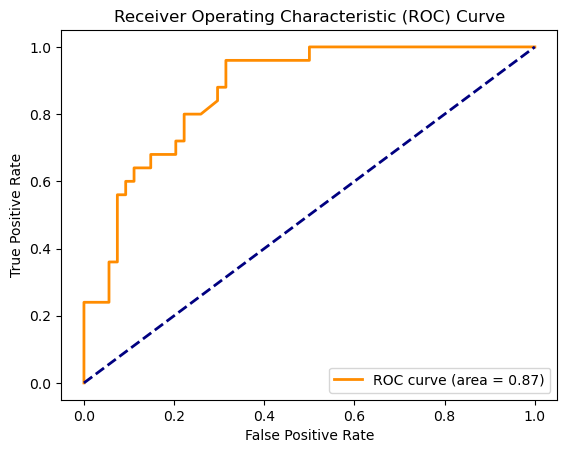

Best parameters for GBDT: {'learning_rate': 0.2}

GBDT Metrics:
Accuracy: 0.7975
Precision: 0.7647
Recall: 0.5200
F1-score: 0.6190


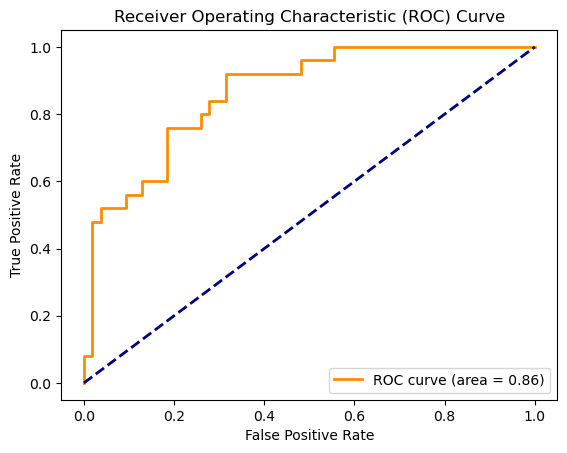

In [26]:
from sklearn.model_selection import GridSearchCV

# Define a function to evaluate models with different learning rates
def evaluate_learning_rates(model, params, X_train, y_train, X_test, y_test, name):
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    compute_metrics_and_plot(best_model, X_test, y_test, name)

# Define learning rates to evaluate
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
reg_lambda_values = [0.01, 0.1, 1.0, 10.0,1000]

# Define parameters for XGBoost Classifier
xgb_params = {
    'learning_rate': learning_rates,
}

# Define parameters for Gradient Boosting Decision Trees (GBDT)
gbdt_params = {
    'learning_rate': learning_rates,
}

# Evaluate XGBoost with different learning rates
evaluate_learning_rates(XGBClassifier(random_state=0, reg_lambda=3.0), xgb_params, X_train, y_train, X_test, y_test, "XGBoost")

# Evaluate GBDT with different learning rates
evaluate_learning_rates(GradientBoostingClassifier(random_state=0), gbdt_params, X_train, y_train, X_test, y_test, "GBDT")


# Cross Validation on the hyperparameters of Random Forest  

### GridSearchCV


Random Forest with GridSearch Cross Validation Metrics:
Accuracy: 0.7722
Precision: 0.6667
Recall: 0.5600
F1-score: 0.6087


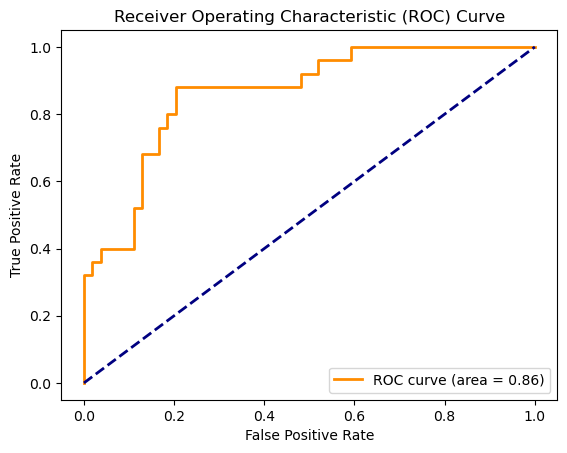

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the reduced parameter grid for Random Forest
param_grid_rf = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='accuracy')

# Fit the data to find the best parameters
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model
compute_metrics_and_plot(best_rf_model, X_test, y_test, "Random Forest with GridSearch Cross Validation")


### Randomized Search CV

c:\Users\straw\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\straw\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\straw\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\straw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}

Tuned Logistic Regression Metrics:
Accuracy: 0.7975
Precision: 0.7647
Recall: 0.5200
F1-score: 0.6190


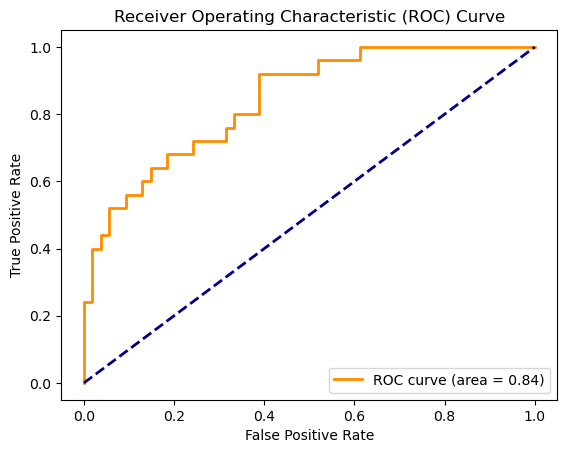

Best parameters for Random Forest: {'max_depth': 6}

Tuned Random Forest Metrics:
Accuracy: 0.7722
Precision: 0.6667
Recall: 0.5600
F1-score: 0.6087


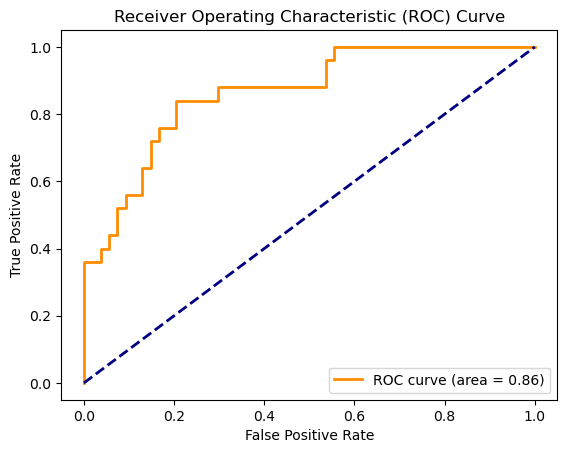

Best parameters for GBDT: {'learning_rate': 0.2, 'max_depth': 3}

Tuned GBDT Metrics:
Accuracy: 0.7975
Precision: 0.7647
Recall: 0.5200
F1-score: 0.6190


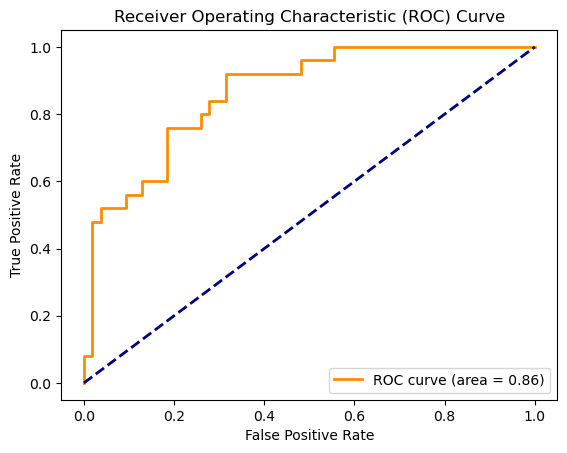

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

Tuned KNN Metrics:
Accuracy: 0.7722
Precision: 0.6842
Recall: 0.5200
F1-score: 0.5909


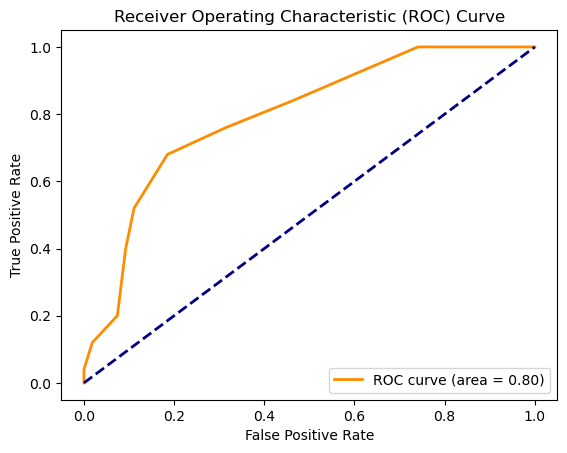

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6}

Tuned XGBoost Metrics:
Accuracy: 0.7848
Precision: 0.6818
Recall: 0.6000
F1-score: 0.6383


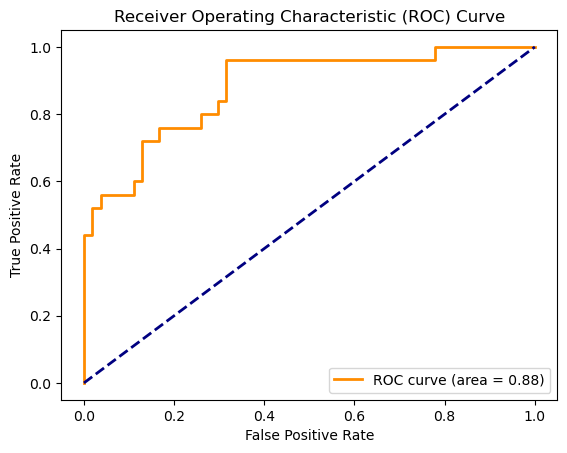

In [30]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV for Logistic Regression
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'penalty': ['l1', 'l2']}
logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=logistic_params, cv=5)
logistic_grid.fit(X_train, y_train)
best_logistic = logistic_grid.best_estimator_
print("Best parameters for Logistic Regression:", logistic_grid.best_params_)
compute_metrics_and_plot(best_logistic, X_test, y_test, "Tuned Logistic Regression")

# GridSearchCV for Random Forest
rf_params = {
            'max_depth': [3, 4, 5, 6]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best parameters for Random Forest:", rf_grid.best_params_)
compute_metrics_and_plot(best_rf, X_test, y_test, "Tuned Random Forest")

# GridSearchCV for Gradient Boosting Decision Trees (GBDT)
gbdt_params = {
               'learning_rate': [0.01, 0.1, 0.2, 0.3],
               'max_depth': [3, 4, 5, 6]}
gbdt_grid = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=gbdt_params, cv=5)
gbdt_grid.fit(X_train, y_train)
best_gbdt = gbdt_grid.best_estimator_
print("Best parameters for GBDT:", gbdt_grid.best_params_)
compute_metrics_and_plot(best_gbdt, X_test, y_test, "Tuned GBDT")

# GridSearchCV for K-Nearest Neighbors (KNN)
knn_params = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print("Best parameters for KNN:", knn_grid.best_params_)
compute_metrics_and_plot(best_knn, X_test, y_test, "Tuned KNN")

# GridSearchCV for XGBoost Classifier
xgb_params = {
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'max_depth': [3, 4, 5, 6]}
xgb_grid = GridSearchCV(XGBClassifier(random_state=0), param_grid=xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best parameters for XGBoost:", xgb_grid.best_params_)
compute_metrics_and_plot(best_xgb, X_test, y_test, "Tuned XGBoost")
